# TD Learning
## SARSA
   
Fabrice Mulotti

version 2

Licence MIT

In [15]:

import gymnasium as gym
import numpy as np

import matplotlib.pyplot as plt

***
## Créons et regardons les caractéristiques de notre environnement

In [16]:
env = gym.make("CliffWalking-v0",render_mode="ansi")
env.reset()

(36, {'prob': 1})

## Etat

In [17]:
env.observation_space.dtype

dtype('int64')

In [18]:
env.observation_space.n

48

In [19]:
env.observation_space.sample()

38

## Action

UP = 0   
RIGHT = 1   
DOWN = 2   
LEFT = 3   

In [20]:
env.action_space.n

4

In [21]:
env.action_space.sample()

2

In [22]:
action = ["up", "right", "down", "left"]

***
## Créons une politique e-greedy

In [23]:
def politique_egreedy(env,Q,s,epsilon):
    # en entrée : env=environnement, Q fonctions action valeur, s = état courant, epsilon= pour espilon-greedy
    r=np.random.uniform()
    if r<epsilon:
        return(env.action_space.sample())
    else:
        return(np.argmax(Q[s,]))
        # autre solution
        # listQ=[]
        #for a in range(env.action_space.n):
        #    listQ.append(Q[s,a])
        # return(np.argmax(listQ))
               

***
## Initialisation

![alt](static/sarsa.png)

## Définissons nos hyper paramètres et initialisons notre Tableau Q(s,a)

In [24]:
alpha=0.5   # learning rate
gamma=1.0   # part du futur
epsilon=0.1 # part de hasard
Q=np.zeros((env.observation_space.n,env.action_space.n))

In [25]:
Q.shape

(48, 4)

In [26]:
# Affiche de valeurs pendant l éxecution
verbose=0

# liste des valeurs pour créer un graphique 
histoRecompense=[]
histoLongueurEpisode=[]

# Nombre d'essai
max_iter=1000
for i in range(max_iter):
    S=env.reset()[0]

    done=False
    truncated=False
    cumulR=0 # cumul des récompenses par épisode
    cumulA=0 # cumul du nombre d'action = longueur des épisodes
    # Votre code : sélection de la premiere action A=....
    A=politique_egreedy(env,Q,S,epsilon)
    
    while not (done or truncated):
        # Votre code = environ 6 lignes de code
        # execution d'un step S_,R,done = ...
        # selection action suivante
        # ajustement de Q
        S_ , R, done, truncated, _ = env.step(A)
        A_=politique_egreedy(env,Q,S_,epsilon)
        
        Q[S,A] = Q[S,A] + alpha*(R+gamma*Q[S_,A_]-Q[S,A])
        # pour debug affichage
        if verbose :
            print(f"From S={S},A={action[A]} to S_={S_},A_={action[A_]} R={R}")
            if done:
                print("----------------------------------------------------")

        cumulR+=R
        cumulA+=1

        # Votre code : transition etat et action S=... A=...
        S=S_
        A=A_

    histoRecompense.append(cumulR)
    histoLongueurEpisode.append(cumulA)

In [27]:
Q

array([[ -21.25427394,  -16.69956246,  -20.29078966,  -20.37375834],
       [ -18.13649357,  -15.49728485,  -19.05375585,  -18.93113262],
       [ -18.65240216,  -14.51667951,  -19.1835029 ,  -18.14161918],
       [ -15.66227796,  -12.30932948,  -15.87029251,  -18.04449433],
       [ -16.14338948,  -10.66959639,  -16.97532215,  -16.35212382],
       [ -14.33033827,   -9.38578882,  -14.69259333,  -15.77963805],
       [ -11.95178535,   -8.29636682,  -12.36820443,  -14.09011151],
       [ -10.80427433,   -7.2593363 ,  -11.25168042,  -12.91397457],
       [ -10.08120388,   -6.28926995,   -9.78934347,  -11.66234078],
       [  -7.06107985,   -5.66696255,   -9.1742787 ,  -10.26858653],
       [  -7.89442796,   -5.19967474,   -7.82435309,   -9.16286567],
       [  -7.24574191,   -7.35798433,   -4.00913875,   -8.40300745],
       [ -20.03594127,  -19.56536333,  -21.5509852 ,  -19.69476352],
       [ -15.9562121 ,  -18.7157032 ,  -20.49351157,  -20.75543518],
       [ -19.19849956,  -16.293349

## Analyse graphique du résultat

/var/folders/mz/hv1rk9n933723p7c90t6gtvw0000gn/T/ipykernel_27854/2344350326.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


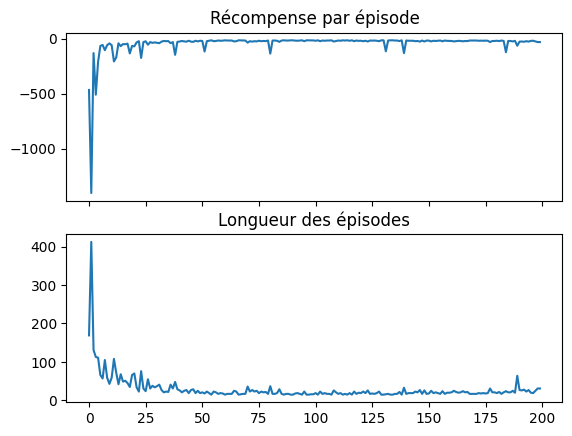

In [28]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)

ax1.set_title("Récompense par épisode")
ax2.set_title("Longueur des épisodes")

# fig.title("Récompenses cumulées par épisode")

ax2.plot(histoLongueurEpisode[0:200])
ax1.plot(histoRecompense[0:200])
fig.show()


In [29]:
## Essayons une simulation

In [30]:
S=env.reset()[0]
done=False
visuel=np.zeros((env.observation_space.n))

while not (done or truncated):
    A=politique_egreedy(env,Q,S,0)
    visuel[S]=1
    S_,R_,done,truncated,_=env.step(A)
    # env.render()
    S=S_
    
visuel[36]=5
visuel[47]=8
print("Les 1 indique le passage de notre robot (0 dans les autres cas)")
print(" ")
print(visuel.reshape(4,12))

Les 1 indique le passage de notre robot (0 dans les autres cas)
 
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8.]]


![alt](static/cliff_walk.png)